# Verifying Credentials 

In [1]:
import tweepy

# Authenticate to Twitter
auth = tweepy.OAuthHandler("x0KwabW0mRqecbq3XPI9ku9Oo", "d3KEWfNHp4Sp6Oj0PvI6QeID2JH7vzah5mKTeIsXmLPCz2D7Sv")
auth.set_access_token("1926506155-EL1UiZfoy7CvuEn7WpQznbmTjHk842v7v4OKMUr","CtoO3ww0jEchZZEIUqCsZGXmWuMjQd6qClRuFJfGGvDmn")
api = tweepy.API(auth, wait_on_rate_limit=True)
# test authentication
try:
    api.verify_credentials()
    print("Authentication OK")
except:
    print("Error during authentication")

Authentication OK


In [104]:
#Blacklivematters
# Open/Create a file to append data
import csv
csvFile = open('blm_final1.csv', 'a')
#Use csv Writer
csvWriter = csv.writer(csvFile)
#Extracting tweets and writing into a csv file.
for tweet in tweepy.Cursor(api.search,q='#BlackLivesMatter -filter:retweets',count=200,
                           lang="en", tweet_mode='extended',
                           since="2020-06-01").items():
    if (not tweet.retweeted) and ('RT @' not in tweet.full_text):
        print (tweet.created_at, tweet.full_text)
        csvWriter.writerow([tweet.created_at, tweet.full_text])

2020-06-11 19:31:28 @nprpolitics Biden is not even our president as of yet, and he is much more of a LEADER than Trumps big toe! 

#GetToPackingTrump
#SystemicRacismReal
#WeNeedSystemicNOW 
#TrumpIsARacist 
#WeNeedMoreBlackLeaders #BlackLivesMatter 
#BidenDemings2020
2020-06-11 19:31:28 @tedcruz, @GregAbbott_TX We want to see real action, not a PR statement. What are you doing to protect your Black constituents from police brutality? (via https://t.co/pfA3olQlPh)  #BlackLivesMatter
2020-06-11 19:31:28 @DonaldJTrumpJr All walls eventually get torn... perhaps you and your redneck followers haven’t read about East &amp; West Germany and the so called wall that a fellow Republican your father can take a lesson from help reduce to rubble!!! #BlackLivesMatter #EnoughIsEnough #NarcissistInChief #Truth
2020-06-11 19:31:28 At a time when racial tensions are at an all time high in the US, @realDonaldTrump yet again flagrantly makes racist comments toward those whose ideals oppose his. He truly i

UnicodeEncodeError: 'charmap' codec can't encode character '\U0001f914' in position 207: character maps to <undefined>

In [4]:
import pandas as pd
colnames=['Date', 'Tweet'] 
data = pd.read_csv('blm_WTF.csv',names=colnames, header=None)

In [5]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 50208 entries, 0 to 50207
Data columns (total 2 columns):
 #   Column  Non-Null Count  Dtype 
---  ------  --------------  ----- 
 0   Date    50208 non-null  object
 1   Tweet   50208 non-null  object
dtypes: object(2)
memory usage: 784.6+ KB


In [6]:
df  = pd.DataFrame(data)

In [8]:
df.tail()

,Date,Tweet
50203,10-06-2020 21:15,@CK44284509 @RealCandaceO Yeah baby! #BlackLiv...
50204,10-06-2020 21:15,"@govandybeshear, We want to see real action, n..."
50205,10-06-2020 21:15,Lawan CHARON lagi | Gameplay God of War Chains...
50206,10-06-2020 21:15,@Breaking911 Amen! #BlackLivesMatter'
50207,10-06-2020 21:15,Did you watch Thursday's (6/4) Special Sharpe ...


We have to clean data because it contains lots of URLs, numbers, and user_ids, which get challenging to analyze tweets.

In [9]:
#cleaning the tweets
import numpy as np
import re
def remove_pattern(input_txt, pattern):
    r = re.findall(pattern, input_txt)
    for i in r:
        input_txt = re.sub(i, '', input_txt)        
    return input_txt
def clean_tweets(tweets):
    #remove twitter Return handles (RT @xxx:)
    tweets = np.vectorize(remove_pattern)(tweets, "RT @[\w]*:") 
    
    #remove twitter handles (@xxx)
    tweets = np.vectorize(remove_pattern)(tweets, "@[\w]*")
    
    #remove URL links (httpxxx)
    tweets = np.vectorize(remove_pattern)(tweets, "https?://[A-Za-z0-9./]*")

    #remove special characters, numbers, punctuations (except for #)
    tweets = np.core.defchararray.replace(tweets, "[^a-zA-Z]", " ")
    
    return tweets

In [14]:
df['Tweet']= clean_tweets(df['Tweet']) #The function clean_tweets were put to use.
df.head()

,Date,Tweet
0,11-06-2020 14:30,To be completely clear; is not welcome in Dal...
1,11-06-2020 14:30,", We want to see real action, not a PR stateme..."
2,11-06-2020 14:30,#BernieSanders #CivilRights #HumanRights #Amer...
3,11-06-2020 14:30,"Join us for an evening of discussion, communit..."
4,11-06-2020 14:30,Beautiful short film and poem reflecting on th...


In [12]:
df.tail()

,Date,Tweet
50203,10-06-2020 21:15,Yeah baby! #BlackLivesMatter #BlackLivesMatt...
50204,10-06-2020 21:15,", We want to see real action, not a PR stateme..."
50205,10-06-2020 21:15,Lawan CHARON lagi | Gameplay God of War Chains...
50206,10-06-2020 21:15,Amen! #BlackLivesMatter'
50207,10-06-2020 21:15,Did you watch Thursday's (6/4) Special Sharpe ...


In [15]:
from vaderSentiment.vaderSentiment import SentimentIntensityAnalyzer
analyzer = SentimentIntensityAnalyzer()

In [16]:
scores = []
# Declare variables for scores
compound_list = []
positive_list = []
negative_list = []
neutral_list = []
for i in range(df['Tweet'].shape[0]):
#print(analyser.polarity_scores(sentiments_pd['Tweet'][i]))
    compound = analyzer.polarity_scores(df['Tweet'][i])["compound"]
    pos = analyzer.polarity_scores(df['Tweet'][i])["pos"]
    neu = analyzer.polarity_scores(df['Tweet'][i])["neu"]
    neg = analyzer.polarity_scores(df['Tweet'][i])["neg"]
    
    scores.append({"Compound": compound,
                       "Positive": pos,
                       "Negative": neg,
                       "Neutral": neu
                  })

In [17]:
sentiments_score = pd.DataFrame.from_dict(scores)
df = df.join(sentiments_score)
df.head()

,Date,Tweet,Compound,Positive,Negative,Neutral
0,11-06-2020 14:30,To be completely clear; is not welcome in Dal...,-0.0539,0.074,0.131,0.795
1,11-06-2020 14:30,", We want to see real action, not a PR stateme...",-0.2732,0.126,0.129,0.744
2,11-06-2020 14:30,#BernieSanders #CivilRights #HumanRights #Amer...,-0.5994,0.000,0.100,0.900
3,11-06-2020 14:30,"Join us for an evening of discussion, communit...",0.2960,0.066,0.000,0.934
4,11-06-2020 14:30,Beautiful short film and poem reflecting on th...,0.7003,0.326,0.000,0.674


(array([ 1764.,  2717.,  2612.,  2525.,  2630.,  1962.,  1523.,  2442.,
         1042.,  1003., 10858.,  1159.,  1441.,  2547.,  2830.,  2569.,
         2538.,  2375.,  2357.,  1314.]),
 array([-0.997  , -0.89772, -0.79844, -0.69916, -0.59988, -0.5006 ,
        -0.40132, -0.30204, -0.20276, -0.10348, -0.0042 ,  0.09508,
         0.19436,  0.29364,  0.39292,  0.4922 ,  0.59148,  0.69076,
         0.79004,  0.88932,  0.9886 ]),
 <a list of 20 Patch objects>)

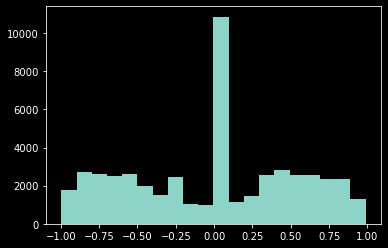

In [34]:
import matplotlib.pyplot as plt
plt.hist(df['Compound'], bins=20)

(array([2.031e+04, 5.732e+03, 6.342e+03, 5.082e+03, 4.062e+03, 2.733e+03,
        1.972e+03, 1.247e+03, 9.240e+02, 6.280e+02, 3.900e+02, 2.750e+02,
        2.090e+02, 1.280e+02, 5.900e+01, 5.900e+01, 2.300e+01, 2.000e+01,
        9.000e+00, 4.000e+00]),
 array([0.     , 0.04365, 0.0873 , 0.13095, 0.1746 , 0.21825, 0.2619 ,
        0.30555, 0.3492 , 0.39285, 0.4365 , 0.48015, 0.5238 , 0.56745,
        0.6111 , 0.65475, 0.6984 , 0.74205, 0.7857 , 0.82935, 0.873  ]),
 <a list of 20 Patch objects>)

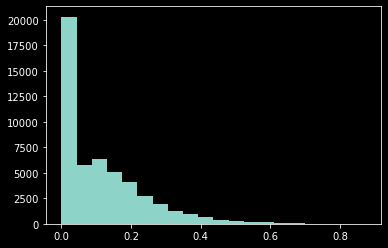

In [35]:
plt.hist(df['Positive'], bins=20)

(array([2.333e+04, 4.481e+03, 5.365e+03, 5.033e+03, 3.701e+03, 2.810e+03,
        1.917e+03, 1.321e+03, 8.410e+02, 5.030e+02, 2.980e+02, 2.020e+02,
        1.570e+02, 1.050e+02, 6.700e+01, 2.600e+01, 2.800e+01, 8.000e+00,
        9.000e+00, 6.000e+00]),
 array([0.     , 0.04425, 0.0885 , 0.13275, 0.177  , 0.22125, 0.2655 ,
        0.30975, 0.354  , 0.39825, 0.4425 , 0.48675, 0.531  , 0.57525,
        0.6195 , 0.66375, 0.708  , 0.75225, 0.7965 , 0.84075, 0.885  ]),
 <a list of 20 Patch objects>)

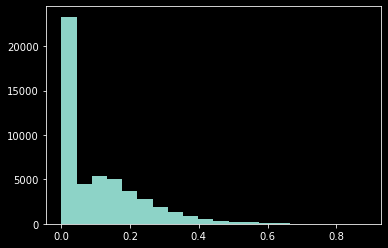

In [36]:
plt.hist(df['Negative'], bins=20)

(array([ 138.,   21.,   27.,   22.,   60.,   72.,  139.,  258.,  461.,
         803., 1367., 2337., 3359., 4729., 6376., 6257., 6208., 4954.,
        2904., 9716.]),
 array([0.  , 0.05, 0.1 , 0.15, 0.2 , 0.25, 0.3 , 0.35, 0.4 , 0.45, 0.5 ,
        0.55, 0.6 , 0.65, 0.7 , 0.75, 0.8 , 0.85, 0.9 , 0.95, 1.  ]),
 <a list of 20 Patch objects>)

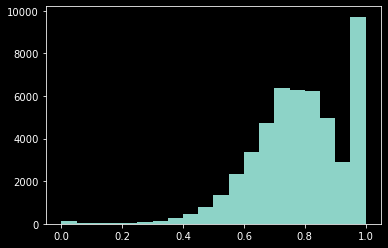

In [37]:
plt.hist(df['Neutral'], bins=20)

In [19]:
import nltk
from nltk.corpus import stopwords
nltk.download('stopwords')
from nltk.tokenize import word_tokenize
def remove_stopwords(text):
    stopword_list = stopwords.words('english')
    tokens = nltk.word_tokenize(text)
    tokens = [token.strip() for token in tokens]
    return ' '.join([token for token in tokens if token not in stopword_list])

[nltk_data] Downloading package stopwords to
[nltk_data]     C:\Users\abhij\AppData\Roaming\nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


In [20]:
df['Tweet'] = df['Tweet'].apply(remove_stopwords)
df.head()

,Date,Tweet,Compound,Positive,Negative,Neutral
0,11-06-2020 14:30,To completely clear ; welcome Dallas . If 're ...,-0.0539,0.074,0.131,0.795
1,11-06-2020 14:30,", We want see real action , PR statement . Wha...",-0.2732,0.126,0.129,0.744
2,11-06-2020 14:30,# BernieSanders # CivilRights # HumanRights # ...,-0.5994,0.000,0.100,0.900
3,11-06-2020 14:30,"Join us evening discussion , community , e nde...",0.2960,0.066,0.000,0.934
4,11-06-2020 14:30,Beautiful short film poem reflecting visions f...,0.7003,0.326,0.000,0.674


In [47]:
positive = 0
for c in df['Compound']:
    if(c>=0.05):
        positive = positive + 1
print('Positive Tweets:', positive) #Total tweets: 50208

Positive Tweets: 19736


In [42]:
Negative = 0
for c in df['Compound']:
    if(c<=-0.05):
        Negative = Negative + 1
print('Negative Tweets:', Negative) #Total tweets: 50208

Negative Tweets: 19892


In [45]:
Neutral = 0
for c in df['Compound']:
    if(c<0.05 and c>-0.05):
        Neutral = Neutral + 1
print('Neutral Tweets:', Neutral) #Total tweets: 50208

Neutral Tweets: 10580


In [43]:
LATIN_1_CHARS = (
    ('\xe2\x80\x99', "'"),
    ('\xc3\xa9', 'e'),
    ('\xe2\x80\x90', '-'),
    ('\xe2\x80\x91', '-'),
    ('\xe2\x80\x92', '-'),
    ('\xe2\x80\x93', '-'),
    ('\xe2\x80\x94', '-'),
    ('\xe2\x80\x94', '-'),
    ('\xe2\x80\x98', "'"),
    ('\xe2\x80\x9b', "'"),
    ('\xe2\x80\x9c', '"'),
    ('\xe2\x80\x9c', '"'),
    ('\xe2\x80\x9d', '"'),
    ('\xe2\x80\x9e', '"'),
    ('\xe2\x80\x9f', '"'),
    ('\xe2\x80\xa6', '...'),
    ('\xe2\x80\xb2', "'"),
    ('\xe2\x80\xb3', "'"),
    ('\xe2\x80\xb4', "'"),
    ('\xe2\x80\xb5', "'"),
    ('\xe2\x80\xb6', "'"),
    ('\xe2\x80\xb7', "'"),
    ('\xe2\x81\xba', "+"),
    ('\xe2\x81\xbb', "-"),
    ('\xe2\x81\xbc', "="),
    ('\xe2\x81\xbd', "("),
    ('\xe2\x81\xbe', ")")
)


def clean_latin1(data):
    try:
        return data.encode('utf-8')
    except UnicodeDecodeError:
        data = data.decode('iso-8859-1')
        for _hex, _char in LATIN_1_CHARS:
            data = data.replace(_hex, _char)
        return data.encode('utf8')

for tweet in df['Tweet']:
    clean_latin1(tweet)

Generating word cloud....
Making plot


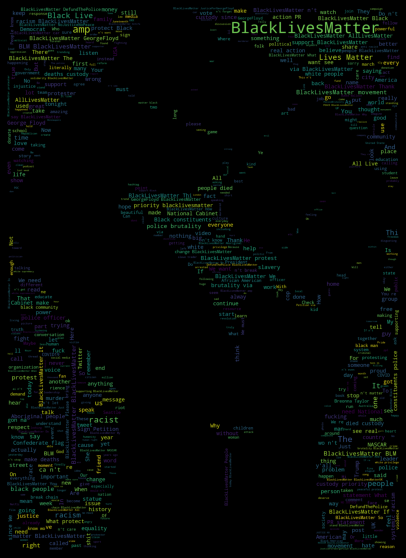

In [49]:
from wordcloud import WordCloud
from PIL import Image
import PIL.ImageOps
from wordcloud import ImageColorGenerator
# import image
char_mask = np.array(Image.open("C:/Users/abhij/Desktop/1.png"))
image_colors = ImageColorGenerator(char_mask)
# generate wordcloud
print('Generating word cloud....')
wc = WordCloud(background_color="black", max_words=700, width=1600, height=800, #contour_width=3, contour_color='white',
mask=char_mask, random_state=1).generate(' '.join(df['Tweet']))
    
print('Making plot')
plt.figure(figsize=(20,10))
ypos = 800
plt.style.use('dark_background')
plt.imshow(wc)
plt.axis("off")
plt.savefig('blm.png')